In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

from epsampling.utils import load_csv
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
from epsampling.utils import drop_sers_with_nans
from epsampling.utils import date_str_to_int

DATA_DIR = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

from IPython.display import Audio

def meow():
    display(Audio(filename='../cat_meow2.wav', autoplay=True))

In [2]:
timestamp = '20241009-144131'

fpath = os.path.join(DATA_DIR,'processed', f'processed_naive_deaths_{timestamp}.csv')
df_deaths = pd.read_csv(fpath)
# display(df)

## Drop rows with nans.
df_deaths.dropna(inplace=True)
# display(df)

## Drop samples with negative inc deaths.
df_deaths = df_deaths[df_deaths.True_inc_deaths >= 0]
# display(df_deaths)

# # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # 

from epsampling.utils import drop_duplicate_cols

# timestamp = '20241009-143022' 

fpath = os.path.join(DATA_DIR,'processed',f'formatted_acs_results_normed_{timestamp}.csv')
df_acs = pd.read_csv(fpath,index_col='Fips')

# Remove duplicate columns
df_acs = drop_duplicate_cols(df_acs)

## Standardize
df_acs=(df_acs-df_acs.mean())/df_acs.std()

In [3]:
df = df_deaths.merge(df_acs, on='Fips')
# display(df)

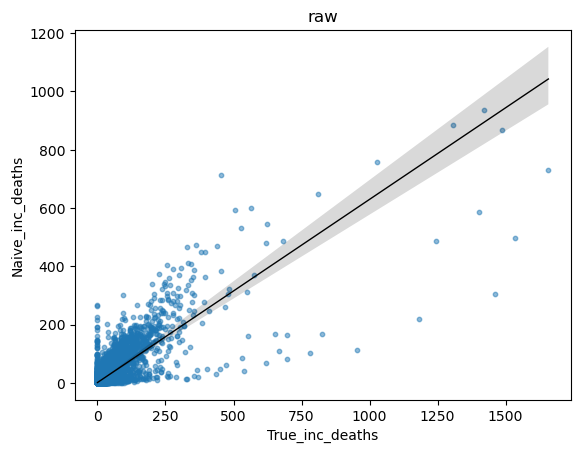

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=df, x="True_inc_deaths", y="Naive_inc_deaths", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('raw') 
# plt.title('y+(1)/pop*100000\n r2: 0.934336') 
# plt.title('y/pop*100000\n r2: -0.016382') 

plt.show()

In [36]:
eps = 1e-3
df['Target'] = df.apply(lambda x: (x.True_inc_deaths+eps) / x.Pop * 100000, axis=1)
df['Naive'] = df.apply(lambda x: (x.Naive_inc_deaths+eps) / x.Pop * 100000, axis=1)


In [8]:
df.iloc[0]

Fips                    1.001000e+03
State_fips              1.000000e+00
Pop                     5.823900e+04
State_pop               4.997675e+06
Ratio                   1.165322e-02
Date                    2.020062e+07
Proj_inc_deaths         8.330216e+01
True_cum_deaths         9.000000e+00
Cum_deaths_tm1          6.000000e+00
True_inc_deaths         3.000000e+00
Naive_inc_deaths        9.707382e-01
POP_NHPINH             -1.779051e-01
POP_NHPI               -1.870414e-01
POP_AIANNH             -2.023801e-01
POP_AIAN               -2.217159e-01
IND_AFFHM_MQE          -3.757055e-01
HU_UIS02               -1.034597e+00
HU_OCC_OPRgt200         3.696589e-01
IND_PSMAW_M             1.126266e+00
OCC_MBSA_ELCAM_L       -6.320060e-01
OCC_SERV_PS_LE         -8.889051e-01
HU_OCC_OPR151200       -1.734444e-01
OCC_NRCM_FFF_x11       -5.342592e-01
IND_AFFHM_AFFH         -6.959102e-01
IND_TWU_U              -4.002689e-01
IND_AFFHM              -7.720793e-01
HU_OCC_OPR101150       -4.681831e-01
O

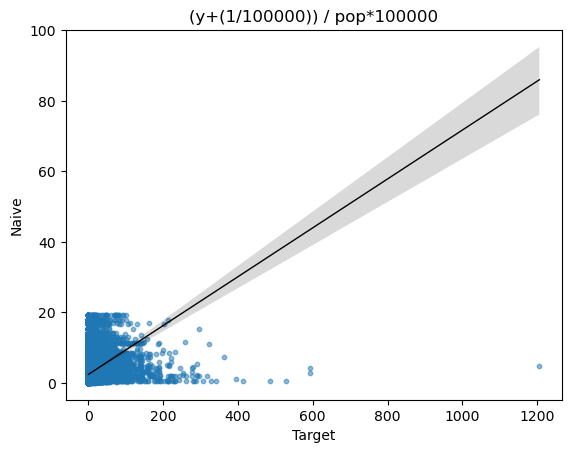

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.regplot(data=df, x="Target", y="Naive", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('(y+(1/100000)) / pop*100000') 
# plt.title('y+(1)/pop*100000\n r2: 0.934336') 
# plt.title('y/pop*100000\n r2: -0.016382') 

plt.show()

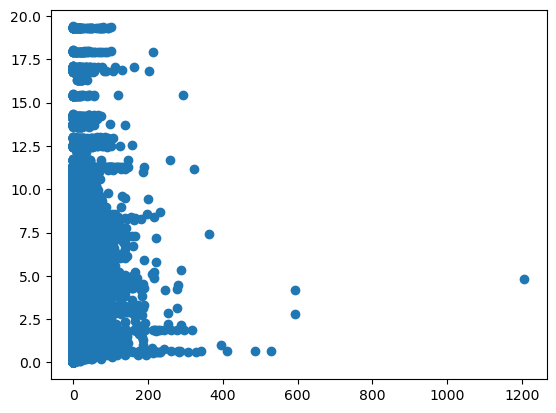

In [41]:
plt.scatter(df.Target, df.Naive)

In [42]:
df.Naive_inc_deaths.describe()

count    304417.000000
mean          2.619243
std          10.916855
min           0.000000
25%           0.176620
50%           0.524140
75%           1.619230
max         935.800903
Name: Naive_inc_deaths, dtype: float64

<Axes: xlabel='Naive_inc_deaths', ylabel='Count'>

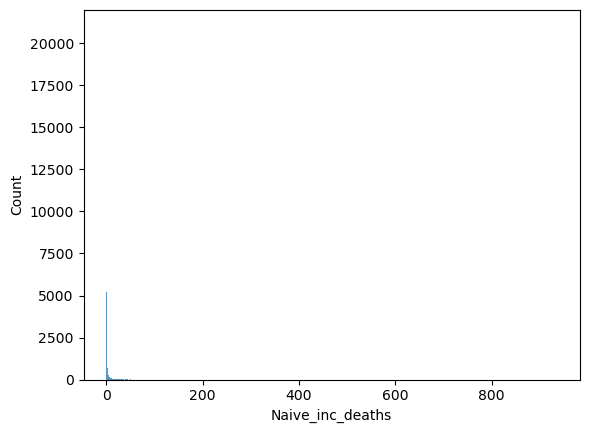

In [11]:
# sns.histplot(df['Naive'])
sns.histplot(df['Naive_inc_deaths'])

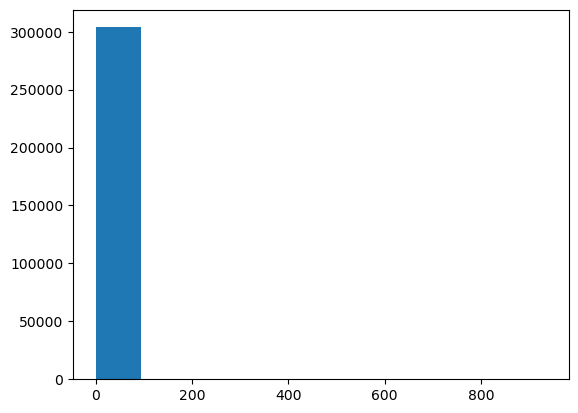

In [31]:
plt.hist(df.Naive_inc_deaths,bins=10)
plt.show()

(array([304156.000000, 199.000000, 32.000000, 12.000000, 7.000000,
        1.000000, 1.000000, 3.000000, 4.000000, 2.000000]),
 array([0.000000, 165.700000, 331.400000, 497.100000, 662.800000,
        828.500000, 994.200000, 1159.900000, 1325.600000, 1491.300000,
        1657.000000]),
 <BarContainer object of 10 artists>)

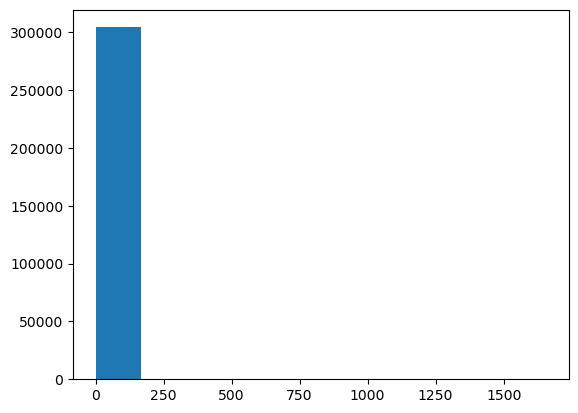

In [32]:
plt.hist(df.True_inc_deaths,bins=10)

In [27]:
df.Naive_inc_deaths.value_counts()

Naive_inc_deaths
0.000000    308
0.071150     13
0.029852     13
0.106867     13
0.023900     13
           ... 
0.578504      1
0.714303      1
0.795782      1
0.782202      1
0.131453      1
Name: count, Length: 251222, dtype: int64

In [21]:
df.Naive_inc_deaths.describe()

count    304417.000000
mean          2.619243
std          10.916855
min           0.000000
25%           0.176620
50%           0.524140
75%           1.619230
max         935.800903
Name: Naive_inc_deaths, dtype: float64

In [24]:
ind = np.argpartition(df.Naive_inc_deaths.values, -20)[-20:]
sorted(df.Naive_inc_deaths.values[ind])

[449.2613807423334,
 466.3791412677388,
 469.0432207006233,
 471.43698820127855,
 481.4867062525077,
 485.0419878387604,
 487.8354233708161,
 498.2473194448418,
 531.1540219993692,
 544.1089981456953,
 586.1135643622298,
 593.4612882269374,
 600.2472281131082,
 647.0612486979903,
 711.9067844219187,
 730.3564172901963,
 757.5289265565561,
 869.0123991540513,
 883.4874741837945,
 935.8009032386556]

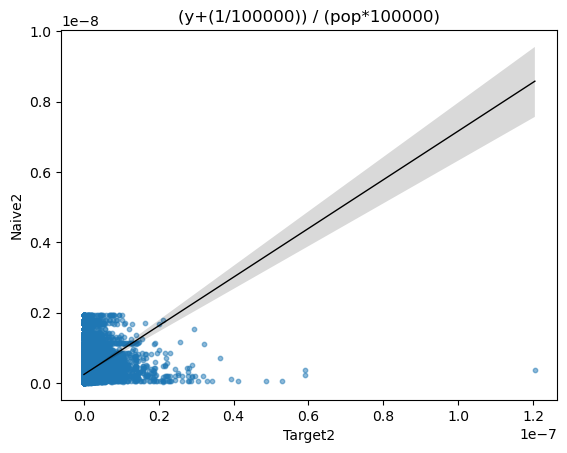

In [7]:
df['Target2'] = df.apply(lambda x: (x.True_inc_deaths+(1/100000)) / (x.Pop * 100000), axis=1)
df['Naive2'] = df.apply(lambda x: (x.Naive_inc_deaths+(1/100000)) / (x.Pop * 100000), axis=1)

sns.regplot(data=df, x="Target2", y="Naive2", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('(y+(1/100000)) / (pop*100000)') 


plt.show()

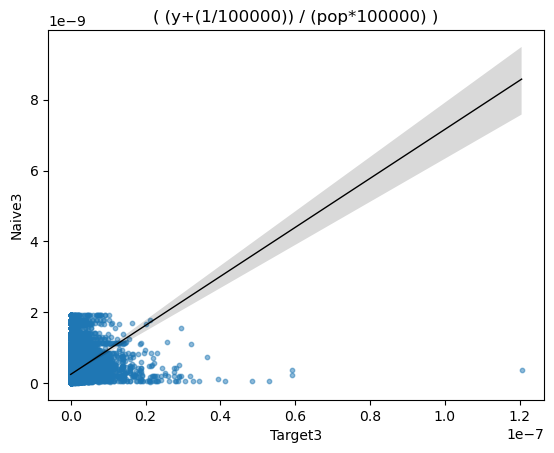

In [11]:
df['Target3'] = df.apply(lambda x: ((x.True_inc_deaths+(1/100000)) / (x.Pop * 100000)), axis=1)
df['Naive3'] = df.apply(lambda x: ((x.Naive_inc_deaths+(1/100000)) / (x.Pop * 100000)), axis=1)

sns.regplot(data=df, x="Target3", y="Naive3", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('( (y+(1/100000)) / (pop*100000) )') 


plt.show()

In [8]:
meow()

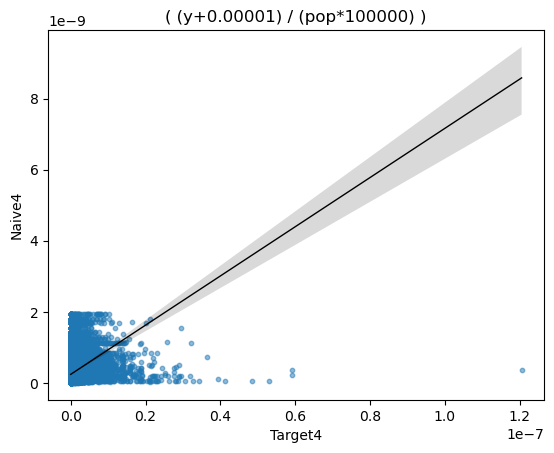

In [12]:
df['Target4'] = df.apply(lambda x: ((x.True_inc_deaths+0.00001) / (x.Pop * 100000)), axis=1)
df['Naive4'] = df.apply(lambda x: ((x.Naive_inc_deaths+0.00001) / (x.Pop * 100000)), axis=1)

sns.regplot(data=df, x="Target4", y="Naive4", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('( (y+0.00001) / (pop*100000) )') 


plt.show()

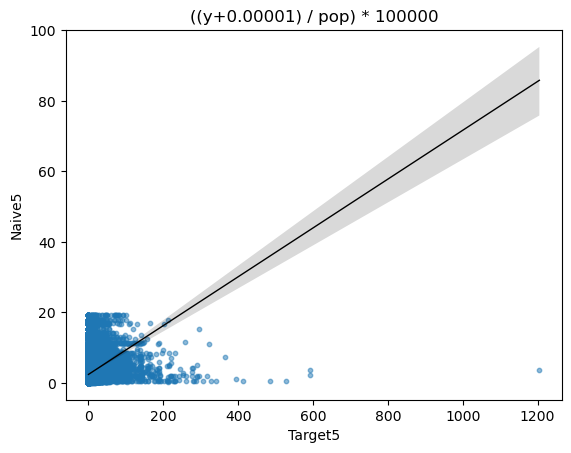

In [13]:
df['Target5'] = df.apply(lambda x: ((x.True_inc_deaths+0.00001) / x.Pop) * 100000, axis=1)
df['Naive5'] = df.apply(lambda x: ((x.Naive_inc_deaths+0.00001) / x.Pop) * 100000, axis=1)

sns.regplot(data=df, x="Target5", y="Naive5", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
plt.title('((y+0.00001) / pop) * 100000') 


plt.show()